In [11]:
import numpy
import pandas
import statsmodels.api as sm
import seaborn
import statsmodels.formula.api as smf 

# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pandas.read_csv(r"C:\Users\piush\Desktop\Dataset\nesarc_pds.csv", low_memory=False)

In [17]:
############################################################################
#DATA MANAGEMENT
############################################################################

#setting variables you will be working with to numeric
#setting variables you will be working with to numeric
data['IDNUM'] =pandas.to_numeric(data['IDNUM'], errors='coerce')
data['TAB12MDX'] = pandas.to_numeric(data['TAB12MDX'], errors='coerce')
data['MAJORDEPLIFE'] = pandas.to_numeric(data['MAJORDEPLIFE'], errors='coerce')
#data['NDSymptoms'] = pandas.to_numeric(data['NDSymptoms'], errors='coerce')
data['SOCPDLIFE'] = pandas.to_numeric(data['SOCPDLIFE'], errors='coerce')
data['S3AQ3C1'] = pandas.to_numeric(data['S3AQ3C1'], errors='coerce')
data['AGE'] =pandas.to_numeric(data['AGE'], errors='coerce')
data['SEX'] = pandas.to_numeric(data['SEX'], errors='coerce')

data['S3AQ3B1'] = pandas.to_numeric(data['S3AQ3B1'], errors='coerce')
data['CHECK321'] =pandas.to_numeric( data['CHECK321'], errors='coerce')
data['S3AQ8B11'] = pandas.to_numeric(data['S3AQ8B11'], errors='coerce')
data['S3AQ8B12'] = pandas.to_numeric(data['S3AQ8B12'], errors='coerce')
data['S3AQ8B13'] = pandas.to_numeric(data['S3AQ8B13'], errors='coerce')
data['S3AQ8B7A'] = pandas.to_numeric(data['S3AQ8B7A'], errors='coerce')
data['S3AQ8B7B'] = pandas.to_numeric(data['S3AQ8B7B'], errors='coerce')
data['S3AQ8B7C'] = pandas.to_numeric(data['S3AQ8B7C'], errors='coerce')
data['S3AQ8B7D'] = pandas.to_numeric(data['S3AQ8B7D'], errors='coerce')
data['S3AQ8B7E'] = pandas.to_numeric(data['S3AQ8B7E'], errors='coerce')
data['S3AQ8B7F'] = pandas.to_numeric(data['S3AQ8B7F'], errors='coerce')
data['S3AQ8B7G'] = pandas.to_numeric(data['S3AQ8B7G'], errors='coerce')
data['S3AQ8B7H'] = pandas.to_numeric(data['S3AQ8B7H'], errors='coerce')
data['S3AQ8B7J'] = pandas.to_numeric(data['S3AQ8B7J'], errors='coerce')

data['S6Q1'] = pandas.to_numeric(data['S6Q1'], errors='coerce')
data['S6Q2'] = pandas.to_numeric(data['S6Q2'], errors='coerce')
data['S6Q3'] = pandas.to_numeric(data['S6Q3'], errors='coerce')
data['S6Q7'] = pandas.to_numeric(data['S6Q7'], errors='coerce')
data['S6Q61'] = pandas.to_numeric(data['S6Q61'], errors='coerce')
data['S6Q62'] = pandas.to_numeric(data['S6Q62'], errors='coerce')
data['S6Q63'] = pandas.to_numeric(data['S6Q63'], errors='coerce')
data['S6Q64'] = pandas.to_numeric(data['S6Q64'], errors='coerce')
data['S6Q65'] = pandas.to_numeric(data['S6Q65'], errors='coerce')
data['S6Q66'] = pandas.to_numeric(data['S6Q66'], errors='coerce')
data['S6Q67'] = pandas.to_numeric(data['S6Q67'], errors='coerce')
data['S6Q68'] = pandas.to_numeric(data['S6Q68'], errors='coerce')
data['S6Q69'] = pandas.to_numeric(data['S6Q69'], errors='coerce')
data['S6Q610'] = pandas.to_numeric(data['S6Q610'], errors='coerce')
data['S6Q611'] = pandas.to_numeric(data['S6Q611'], errors='coerce')
data['S6Q612'] = pandas.to_numeric(data['S6Q612'], errors='coerce')
data['S6Q613'] = pandas.to_numeric(data['S6Q613'], errors='coerce')

data['S3AQ3C1']=data['S3AQ3C1'].replace(99, numpy.nan)

# run this subset code to do the NDsymptoms regression (age 18-25, smoked in past month)
# pandas gives observations missing on all symptoms (N=3) a value of zero, but should be nan
# have to delete them 
sub1=data[(data['AGE']<=25) & (data['CHECK321']==1) & (data['S3AQ3B1']==1) & 
(data['IDNUM']!=20346) & (data['IDNUM']!=36471) & (data['IDNUM']!=28724)]

# run this code to do all other regression analyses
sub1=data[(data['AGE']<=25) & (data['CHECK321']==1) & (data['S3AQ3B1']==1)]

# Current Tolerance criteria #1 DSM-IV
def crit1 (row):
   if row['S3AQ8B11']==1 or row['S3AQ8B12'] == 1 :
      return 1
   elif row['S3AQ8B11']==2 and row['S3AQ8B12']==2 :
      return 0
sub1['crit1'] = sub1.apply (lambda row: crit1 (row),axis=1)
chk2 = sub1['crit1'].value_counts(sort=False, dropna=False)
print (chk2)
chk3 = sub1['S3AQ8B11'].value_counts(sort=False, dropna=False)
print (chk3)
chk4 = sub1['S3AQ8B12'].value_counts(sort=False, dropna=False)
print (chk4)
print (pandas.crosstab(sub1['S3AQ8B11'], sub1['S3AQ8B12']))

c1 = sub1['S3AQ8B7J'].value_counts(sort=False, dropna=False)
print (c1)

#Current 8 WITHDRAWAL SUB-SYMPTOMS IN DSM-IV (recode 1,2 to 0,1 for summing)
# after recoding 9s to missing
recode1 = {1: 1, 2: 0}
sub1['S3AQ8B7A']=sub1['S3AQ8B7A'].replace(9, numpy.nan)
sub1['S3AQ8B7A']= sub1['S3AQ8B7A'].map(recode1)
sub1['S3AQ8B7B']=sub1['S3AQ8B7B'].replace(9, numpy.nan)
sub1['S3AQ8B7B']= sub1['S3AQ8B7B'].map(recode1)
sub1['S3AQ8B7C']=sub1['S3AQ8B7C'].replace(9, numpy.nan)
sub1['S3AQ8B7C']= sub1['S3AQ8B7C'].map(recode1)
sub1['S3AQ8B7D']=sub1['S3AQ8B7D'].replace(9, numpy.nan)
sub1['S3AQ8B7D']= sub1['S3AQ8B7D'].map(recode1)
sub1['S3AQ8B7E']=sub1['S3AQ8B7E'].replace(9, numpy.nan)
sub1['S3AQ8B7E']= sub1['S3AQ8B7E'].map(recode1)
sub1['S3AQ8B7F']=sub1['S3AQ8B7F'].replace(9, numpy.nan)
sub1['S3AQ8B7F']= sub1['S3AQ8B7F'].map(recode1)
sub1['S3AQ8B7G']=sub1['S3AQ8B7G'].replace(9, numpy.nan)
sub1['S3AQ8B7G']= sub1['S3AQ8B7G'].map(recode1)
sub1['S3AQ8B7H']=sub1['S3AQ8B7H'].replace(9, numpy.nan)
sub1['S3AQ8B7H']= sub1['S3AQ8B7H'].map(recode1)

# check recode
chk1c = sub1['S3AQ8B7J'].value_counts(sort=False, dropna=False)
print (chk1c)

# sum symptoms
sub1['CWITHDR_COUNT'] = numpy.nansum([sub1['S3AQ8B7A'], sub1['S3AQ8B7B'], sub1['S3AQ8B7C'], 
              sub1['S3AQ8B7D'], sub1['S3AQ8B7E'], sub1['S3AQ8B7F'],
              sub1['S3AQ8B7G'], sub1['S3AQ8B7H']], axis=0)

# check to make sure sum code worked
chksum=sub1[['IDNUM','S3AQ8B7A', 'S3AQ8B7B', 'S3AQ8B7C', 'S3AQ8B7D', 
           'S3AQ8B7E', 'S3AQ8B7F', 'S3AQ8B7G', 'S3AQ8B7H', 'CWITHDR_COUNT']]
chksum.head(n=50)

chk1d = sub1['CWITHDR_COUNT'].value_counts(sort=False, dropna=False)
print (chk1d)

# withdrawal (yes/no)
def crit2 (row):
   if row['CWITHDR_COUNT']>=4 or row['S3AQ8B7J']==1:
      return 1
   elif row['CWITHDR_COUNT']<4 and row['S3AQ8B7J']!=1:
      return 0
sub1['crit2'] = sub1.apply (lambda row: crit2 (row),axis=1)
print (pandas.crosstab(sub1['CWITHDR_COUNT'], sub1['crit2']))


#Current Larger amount or longer period criteria #3 DSM-IV
sub1['S3AQ8B13']=sub1['S3AQ8B13'].replace(9, numpy.nan)
sub1['S3AQ8B13']= sub1['S3AQ8B13'].map(recode1)
  
chk1d = sub1['S3AQ8B13'].value_counts(sort=False, dropna=False)
print (chk1d)


#Current Cut down criteria #4 DSM-IV
sub1['S3AQ8B6'] = pandas.to_numeric(sub1['S3AQ8B6'], errors='coerce')
sub1['S3AQ8B1'] = pandas.to_numeric(sub1['S3AQ8B1'], errors='coerce')
def crit4 (row):
   if row['S3AQ8B6']==1 or row['S3AQ8B1'] == 1 :
      return 1
   elif row['S3AQ8B6']==2 and row['S3AQ8B1']==2 :
      return 0
sub1['crit4'] = sub1.apply (lambda row: crit4 (row),axis=1)
chk1e = sub1['crit4'].value_counts(sort=False, dropna=False)
print (chk1e)


#Current Substance aCtivities criteria #5 DSM-IV
sub1['S3AQ8B5'] = pandas.to_numeric(sub1['S3AQ8B5'], errors='coerce')
sub1['S3AQ8B5']=sub1['S3AQ8B5'].replace(9, numpy.nan)
sub1['S3AQ8B5']= sub1['S3AQ8B5'].map(recode1)

chk1f = sub1['S3AQ8B5'].value_counts(sort=False, dropna=False)
print (chk1f)

#Current Reduce aCtivities criteria #6 DSM-IV
sub1['S3AQ8B2'] = pandas.to_numeric(sub1['S3AQ8B2'], errors='coerce')
sub1['S3AQ8B3'] = pandas.to_numeric(sub1['S3AQ8B3'], errors='coerce')
def crit6 (row):
   if row['S3AQ8B2']==1 or row['S3AQ8B3'] == 1 :
      return 1
   elif row['S3AQ8B2']==2 and row['S3AQ8B3']==2 :
      return 0
sub1['crit6'] = sub1.apply (lambda row: crit6 (row),axis=1)
chk1g = sub1['crit6'].value_counts(sort=False, dropna=False)
print (chk1g)

#Current use continued despite knowledge of physical or psychological problem criteria #7 DSM-IV
sub1['S3AQ8B4'] = pandas.to_numeric(sub1['S3AQ8B4'], errors='coerce')
sub1['S3AQ8B14'] = pandas.to_numeric(sub1['S3AQ8B14'], errors='coerce')
def crit7 (row):
   if row['S3AQ8B4']==1 or row['S3AQ8B14'] == 1 :
      return 1
   elif row['S3AQ8B4']==2 and row['S3AQ8B14']==2 :
      return 0
sub1['crit7'] = sub1.apply (lambda row: crit7 (row),axis=1)
chk1h = sub1['crit7'].value_counts(sort=False, dropna=False)
print (chk1h)

# sum all symptoms (np.nansum allows rows with some missing values to count all valid values)
# instead of recoding the sum to nan
sub1['NDSymptoms'] = numpy.nansum([sub1['crit1'], sub1['crit2'], sub1['S3AQ8B13'], 
              sub1['crit4'], sub1['S3AQ8B5'], sub1['crit6'],
              sub1['crit7']], axis=0 )
chk2 = sub1['NDSymptoms'].value_counts(sort=False, dropna=False)
print (chk2)


c1 = sub1["MAJORDEPLIFE"].value_counts(sort=False, dropna=False)
print(c1)
c2 = sub1["AGE"].value_counts(sort=False, dropna=False)
print(c2)
# binary nictoine dependence
def NICOTINEDEP (x):
   if x['TAB12MDX']==1:
      return 1
   else: 
      return 0
sub1['NICOTINEDEP'] = sub1.apply (lambda x: NICOTINEDEP (x), axis=1)
print (pandas.crosstab(sub1['TAB12MDX'], sub1['NICOTINEDEP']))

# rename variables
sub1.rename(columns={'S3AQ3C1': 'numbercigsmoked'}, inplace=True)

c6 = sub1["numbercigsmoked"].value_counts(sort=False, dropna=False)
print(c6)

def PANIC (x1):
    if ((x1['S6Q1']==1 and x1['S6Q2']==1) or (x1['S6Q2']==1 and x1['S6Q3']==1) or 
    (x1['S6Q3']==1 and x1['S6Q61']==1) or (x1['S6Q61']==1 and x1['S6Q62']==1) or 
    (x1['S6Q62']==1 and x1['S6Q63']==1) or (x1['S6Q63']==1 and x1['S6Q64']==1) or 
    (x1['S6Q64']==1 and x1['S6Q65']==1) or (x1['S6Q65']==1 and x1['S6Q66']==1) or 
    (x1['S6Q66']==1 and x1['S6Q67']==1) or (x1['S6Q67']==1 and x1['S6Q68']==1) or 
    (x1['S6Q68']==1 and x1['S6Q69']==1) or (x1['S6Q69']==1 and x1['S6Q610']==1) or 
    (x1['S6Q610']==1 and x1['S6Q611']==1) or (x1['S6Q611']==1 and x1['S6Q612']==1) or 
    (x1['S6Q612']==1 and x1['S6Q613']==1) or (x1['S6Q613']==1 and x1['S6Q7']==1) or 
    x1['S6Q7']==1):
        return 1
    else:
        return 0
sub1['PANIC'] = sub1.apply (lambda x1: PANIC (x1), axis=1)
c7 = sub1["PANIC"].value_counts(sort=False, dropna=False)
print(c7)

# 4 category ethnicity variable
sub1['ETHRACE2A'] = pandas.to_numeric(sub1['ETHRACE2A'], errors='coerce')
recode2 = {1: 1, 2: 2, 3: 3, 4: 3, 5: 0}
sub1['ETHRACE2A'] = sub1['ETHRACE2A'].replace(9, numpy.nan)
sub1['ETHRACE'] = sub1['ETHRACE2A'].map(recode2)

c8 = sub1["ETHRACE2A"].value_counts(sort=False, dropna=False)
print(c8)

c9 = sub1["ETHRACE"].value_counts(sort=False, dropna=False)
print(c9)

############################################################################
# END DATA MANAGEMENT
############################################################################



C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

0.00    968
1.00    338
nan      14
Name: crit1, dtype: int64
1.00     209
2.00    1098
9.00      13
Name: S3AQ8B11, dtype: int64
1.00     207
2.00    1101
9.00      12
Name: S3AQ8B12, dtype: int64
S3AQ8B12  1.00  2.00  9.00
S3AQ8B11                  
1.00        78   130     1
2.00       128   968     2
9.00         1     3     9
nan     809
1.00    264
2.00    243
9.00      4
Name: S3AQ8B7J, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

nan     809
1.00    264
2.00    243
9.00      4
Name: S3AQ8B7J, dtype: int64
0.00    648
1.00    161
2.00    132
3.00    109
4.00     99
5.00     77
6.00     53
7.00     29
8.00     12
Name: CWITHDR_COUNT, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\

crit2            0   1
CWITHDR_COUNT         
0.00           648   0
1.00           161   0
2.00            85  47
3.00            68  41
4.00             0  99
5.00             0  77
6.00             0  53
7.00             0  29
8.00             0  12
0.00    869
1.00    439
nan      12
Name: S3AQ8B13, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\

0.00    359
1.00    954
nan       7
Name: crit4, dtype: int64
0.00    844
1.00    467
nan       9
Name: S3AQ8B5, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\

0.00    1205
1.00     109
nan        6
Name: crit6, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.00    613
1.00    697
nan      10
Name: crit7, dtype: int64
0.00    205
1.00    257
2.00    241
3.00    211
4.00    163
5.00    140
6.00     83
7.00     20
Name: NDSymptoms, dtype: int64
0    965
1    355
Name: MAJORDEPLIFE, dtype: int64
18    130
19    149
20    180
21    178
22    175
23    172
24    196
25    140
Name: AGE, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2748: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


NICOTINEDEP    0    1
TAB12MDX             
0            521    0
1              0  799
nan        5
1.00      22
2.00      28
3.00      45
4.00      46
5.00     108
6.00      47
7.00      38
8.00      36
9.00       6
10.00    350
11.00      3
12.00     25
13.00      7
14.00      2
15.00     97
16.00      5
17.00      2
18.00      3
19.00      1
20.00    357
25.00     13
27.00      1
28.00      1
30.00     38
35.00      1
40.00     29
60.00      2
80.00      1
98.00      1
Name: numbercigsmoked, dtype: int64
0    1115
1     205
Name: PANIC, dtype: int64
1    849
2    170
3     30
4     47
5    224
Name: ETHRACE2A, dtype: int64
0    224
1    849
2    170
3     77
Name: ETHRACE, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\

In [9]:
############################################################################
# CATEGORICAL EXPLANATORY VARIABLES
############################################################################
# depression
reg1 = smf.ols('NDSymptoms ~ MAJORDEPLIFE', data=sub1).fit()
print (reg1.summary())


                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     152.2
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.57e-33
Time:                        21:49:36   Log-Likelihood:                -2629.6
No. Observations:                1320   AIC:                             5263.
Df Residuals:                    1318   BIC:                             5273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        2.1813      0.057     38.172   

And here are our parameter estimates in p-values The parameter estimate for MAJORDEPLIFE is 1.36 and is statistically significant. The Intercept is 2.19. Thus we know that our equation is NDSymptoms = 2.19 + 1.36 x MAJORDEPLIFE. >> Lets consider what this equation actually means since it's not the best fit line of a scatter plot. 

We know that variable MAJORDEPLIFE is our depression variable and it takes on the value zero if the individual does not have major depression and the value one if the individual does have major depression. Thus we can plug in the values zero and one into our major debt life variable to get the expected number of nicotine dependence symptoms for each group. 


As we can see, we would expect daily smokers without depression to have 2.19 nicotine dependence symptoms and daily smokers with depression to have 3.55 nicotine dependence symptoms. 


Remember that we previously subset our data to daily smokers aged 18 to 25. >> Notice that this is also the mean number of nicotine dependence symptoms for each group which we can see by running summary statistics using the groupby function. To do this, we'll add syntax that creates a data frame that includes only the variables from our regression model and these symptoms in MAJORDEPLIFE. Then, we use the groupby function to estimate the means for each level of MAJORDEPLIFE in ds1 and the standard deviations for MAJORDEPLIFE in ds2. We can also graph the means using the seaborn.factorplot function. 

Mean
              NDSymptoms
MAJORDEPLIFE            
0                   2.18
1                   3.54
Standard deviation
              NDSymptoms
MAJORDEPLIFE            
0                   1.76
1                   1.83


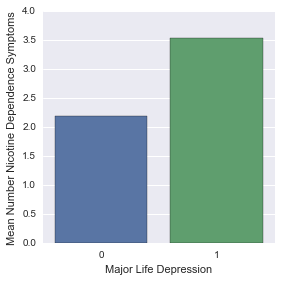

In [13]:
# listwise deletion for calculating means for regression model observations
sub1 = sub1[['NDSymptoms', 'MAJORDEPLIFE']].dropna()

# group means & sd
print ("Mean")
ds1 = sub1.groupby('MAJORDEPLIFE').mean()
print (ds1)
print ("Standard deviation")
ds2 = sub1.groupby('MAJORDEPLIFE').std()
print (ds2)

# bivariate bar graph
seaborn.factorplot(x="MAJORDEPLIFE", y="NDSymptoms", data=sub1, kind="bar", ci=None)
plt.xlabel('Major Life Depression')
plt.ylabel('Mean Number Nicotine Dependence Symptoms')




Before doing this though, I will make sure that my categorical explanatory variables have one group that's coded zero. And I will center my quantitative variable. My major depression variable is already coded one equals depression. And zero equals no depression. However, my quantitative number of cigarettes smoked variable ranges from one to 98. Because zero is not a valid value for this variable, I should center it by subtracting the mean number of cigarettes smoked from the actual value from each observation. 

In [18]:
##############################################################################
# MULTIPLE REGRESSION & CONFIDENCE INTERVALS
##############################################################################

# adding number of cigarettes smoked as an explanatory variable 
# center quantitative IVs for regression analysis
sub1['numbercigsmoked_c'] = (sub1['numbercigsmoked'] - sub1['numbercigsmoked'].mean())
print (sub1['numbercigsmoked_c'].mean()) 





-1.3292282357185144e-14


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We can see that the mean is equal to zero and then thirteen zeros one eight three seven, which essentially centers the variable at zero. Now we can go back to our regression model for the association between depression and number of nicotine dependent symptoms. And add our centered number of cigarette smoked variable. Here is the output. Examine the p values and parameter estimates for each predictor variable. IE our explanatory variable, depression, and our potential confounder, number of cigarettes smoked. As you can see both P values are less than 0.05. And both of the parameter estimates are positive. Indicating that having major depression, and smoking more cigarettes is associated with having a greater number of nicotine dependent symptoms. 

Thus, we can conclude that both major depression and number of cigarettes smoked are significantly associated with number of nicotine dependent symptoms. After partialing out the part of the association that can be accounted for by the other. In other words, depression is positively associated with number of nicotine-dependent symptoms after controlling for number of cigarettes smoked. And, number of cigarettes smoked is positively associated with number of nicotine-dependent symptoms after controlling for the presence, or absence of depression. 

Note, that if a parameter estimate is negative and the P value is significant. It would mean that there was a negative relationship between that variable and the response variable. 

Suppose we started with a different explanatory variable. Dysthymia is pervasive, low level depression, that last a long time, often a few years. Suppose we wanted to test the linear relationship between Dysthymia. A binary, categorical, explanatory variable, and number of nicotine dependent symptoms, a quantitative response variable. 

You can see from the significant P value and positive parameter estimate that dysthymia is positively associated with number of nicotine dependence symptoms. That is, the presence of dysthymia is associated with a larger number of nicotine dependant symptoms. And the absence of dysthymia is associated with a smaller number of nicotine dependent symptoms. 

While dysthymia is long lasting low level depression, major depression is a disorder characterized by a discrete episode of severe depression. 

So what happens when we control for major depression in this model? 

As you can see Dysthymia is no longer significantly associated with the number of nicotine dependent symptoms, after controlling for major depression. 

Here, we have an example of confounding. 

We would say that major depression confounds the relationship between dysthymia and number of nicotine dependent symptoms. Because the p value for dysthymia is no longer significant when major depression is included in the model. 

As in the previous example, using multiple regression, we can continue to add variables to this model in order to evaluate multiple predictors of our quantitative response variable number of nicotine dependent symptoms. Here we can see that when evaluating the independent association among several predictor variables and nicotine dependent symptoms major depression and number of cigarettes smoked. Are positively and significantly associated with number of nicotine dependent symptoms. While Dysthymia, age, and gender are not. 

Know also that we've centered our quantitative age variable by subtracting the mean age from the actual age for each observation following the same procedure we used to center our number of cigarettes smoked explanatory variable. 

In [20]:
sub3 = sub1[['NDSymptoms', 'numbercigsmoked', 'MAJORDEPLIFE']].dropna()

# multiple regression with depression and centered number of cigarettes smoked
reg2 = smf.ols('NDSymptoms ~ MAJORDEPLIFE + numbercigsmoked_c', data=sub1).fit()
print (reg2.summary())



                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     98.85
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.03e-40
Time:                        22:10:37   Log-Likelihood:                -2599.7
No. Observations:                1315   AIC:                             5205.
Df Residuals:                    1312   BIC:                             5221.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             2.1921      0.05

In [21]:
# linear regression analysis with dysphoria 
reg3 = smf.ols('NDSymptoms ~ DYSLIFE', data=sub1).fit()
print (reg3.summary())



                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     30.62
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.78e-08
Time:                        22:10:47   Log-Likelihood:                -2686.5
No. Observations:                1320   AIC:                             5377.
Df Residuals:                    1318   BIC:                             5387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.4724      0.053     46.859      0.0

In [22]:
# multiple regression analysis with dysphoria & depression
reg4 = smf.ols('NDSymptoms ~ DYSLIFE + MAJORDEPLIFE', data=sub1).fit()
print (reg4.summary())



                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     77.67
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.30e-32
Time:                        22:10:56   Log-Likelihood:                -2628.1
No. Observations:                1320   AIC:                             5262.
Df Residuals:                    1317   BIC:                             5278.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        2.1761      0.057     38.054   

In [23]:
# multiple regression analysis with dysphoria & depression + other covariates
# centering age variable
sub1['age_c']=(sub1['AGE'] - sub1['AGE'].mean())
print (sub1['age_c'].mean()) 

reg5 = smf.ols('NDSymptoms ~ DYSLIFE + MAJORDEPLIFE + numbercigsmoked_c + age_c + SEX', data=sub1).fit()
print (reg5.summary())

-3.445055688533819e-16
                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     40.74
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.91e-39
Time:                        22:11:04   Log-Likelihood:                -2596.9
No. Observations:                1315   AIC:                             5206.
Df Residuals:                    1309   BIC:                             5237.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept      

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Let's re-run the code for a multiple regression model predicting nicotine dependent symptoms. 

Now, if you take a look at the output you'll see that the results are the same. Although there's an additional set of columns for the parameter estimates that provide the estimated lower, and upper limits for the 95% confidence interval for each parameter estimate.

For example, if we take a look at the parameter estimate for major dep life, we see that it is 1.3. 

Meaning that on average individuals with major depression have 1.3 more nicotine dependent symptoms than people without major depression. 

This is our point estimate of the population perimeter. 

If we look at the conference interval though we see that it ranges from 1.1 to 1.5. Meaning that we're 95% certain, that the true population parameter for the association between major life depression, and number of nicotine dependant symptoms fall somewhere between 1.1 and 1.5. That is, in the population, there's a 95% chance that people with major life depression have anywhere between 1.1 and 1.5 more nicotine dependent symptoms than people without major depression. Also note that our dysthymia variable, dyslife, had a P value of .19 which is not statistically significant. We could not reject the null hypothesis of no association between dysthymia, and number of nicotine dependent symptoms, afterly adjusted for major life depression, and the other explanatory variables in the model. 

If we take a look at the confidence interval for this variable. We see that it ranges from -0.1 to 0.7, which includes a value of 0 in that range. 

This means that we can't rule out with 95% confidence the possibility that the association between dysthymia, and number of nicotine dependent symptoms, and for adjusting for other variables in the model, is 0. 

In linear regression, when you have a non significant P value, the 95% confidence interval for the parameter estimate will include a value of 0, no association. 

In [24]:
# multiple regression analysis with dysphoria & depression + other covariates
# centering age variable
sub1['age_c']=(sub1['AGE'] - sub1['AGE'].mean())
print (sub1['age_c'].mean()) 

reg5 = smf.ols('NDSymptoms ~ DYSLIFE + MAJORDEPLIFE + numbercigsmoked_c + age_c + SEX', data=sub1).fit()
print (reg5.summary())

-3.445055688533819e-16
                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     40.74
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.91e-39
Time:                        22:11:08   Log-Likelihood:                -2596.9
No. Observations:                1315   AIC:                             5206.
Df Residuals:                    1309   BIC:                             5237.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept      

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The process of coding categorical explanatory variables is called dummy coding, or parameterization. And these dummy coding, or parameterization, methods can produce explanatory group comparisons ranging from very simple to very complex. For example, if our response variable is number of nicotine dependence symptoms, we might want to compare the number of symptoms from one group to the average number of symptoms for the other groups combined. This type of comparison is called effect coding, or effect parameterization. In this course, we're going to use one of the most basic parameterizations, which is called reference group coding, or reference group parameterization. 


This method is very similar to the post hoc pair-wise comparisons that you may have conducted as a follow-up to running an analysis of variance in the second course of this specialization, Data Analysis Tools. That is, reference group coding allows us to compare each group of our explanatory variable, referred to as the comparison groups, to another group, which is referred to as the reference group. For example, if our response variable is the number of nicotine dependence symptoms, reference coding allows us to compare number of nicotine dependence symptoms for each group of our categorical variable to a designated reference group. However, unlike an analysis of variance post hoc test, for which we conduct the comparisons after testing the ANOVA, the comparisons are part of the estimation of the multi regression model. This allows us to examine explanatory variable group differences on the response variable after adjusting for the other explanatory variables in the model. To demonstrate how to analyze a categorical explanatory variable with three or more categories, we will return to our NESARC data multiple work aggression analysis, predicting number of nicotine dependent symptoms for multiple explanatory variables. We could also add an ethnicity-race explanatory variable. Our ethnicity-race variable has four categories coded 0 = Hispanic, 1 = non-Hispanic White, 2 = non-Hispanic Black, and 3 = non-Hispanic Other ethnic or racial group. In this example, what we wanna know is whether Hispanic individuals have more or less nicotine dependence symptoms compared to individuals from the other three racial, ethnic groups. That is, we want to compare Hispanic individuals, the reference group, to individuals from the other racial ethnic groups, the comparison groups, on a number of nicotine dependence symptoms after controlling for the other explanatory variables in the model. To do this, we will use the same smf.ols function that we used to test our earlier multiple regression model. So we have our regression equation for which our NDsymptoms response variable is being predicted by the explanatory variables DYSLIFE, MAJORDEPLIFE, numbercigsmoked_c, age_c, SEX. We add our ethnicity race variable, ETHRACE, to the list of explanatory variables. But to tell Python that it is a categorical variable, we need to type a capital C and then put the name of the categorical variable in parentheses after the capital C. In this example, we want to compare the Hispanic group to the three other ethnicity race groups. So this will be our reference group. If you remember, our ethnicity race variable is coded 0 for Hispanic. The default and Python is reference group coding, which in python is called treatment coding. And the default reference category is the group with a value equal to 0, which is Hispanic in this case. Since this is what we're looking for in this example, we do not need to add any code to change the default. If we hadn't added a capital C with the ETHRACE variable in parentheses, Python would have assumed that our ethnicity race variable was a quantitative variable, so the regression coefficient would make no sense. Here's the output. Basically it is the same output that we see with the smf.ols function. But, if we look at our table of parameter estimates, we see that there are three regression coefficients for our categorical ethnicity race variable. Note that there is no estimate for the Hispanic reference group. The t dot and the number after it tells us that the treatment, that is reference group, parameterization was used and the number is the categorical variable code for the group. For example, the non-Hispanic white group in our ETHRACE variable was coded 1. So the t.1 indicates that it is the regression coefficient for the comparison of the non-Hispanic White ethnic race group to our Hispanic reference group. The three regression coefficients compare each of our ethnicity race groups to the Hispanic group. We can see that none of these three groups were significantly different from the Hispanic group in number of nicotine dependent symptoms because the p values all exceed our alpha level of .05. As with the previous regression analysis, we see that major life depression and number of cigarettes smoked are positively associated with number of nicotine dependent systems. If we wanted to make other comparisons, for example, to compare non-Hispanic White to non-Hispanic Black, then we would need to override the default reference group so that the value of 1 in the ETHRACE variable, which indicates the non-Hispanic White group, is used as the reference group. The code here shows how to do it. It's mostly the same code, but now because we are not using the default, we need to add some code to tell Python to continue to use the treatment or reference group coding and designate the reference group. We do this by adding a comma after the name of our ETHRACE variable in parentheses. Then treatment with a capital T. And then within another set of parenthesis, reference=1. This additional Python code provides a comparison of the three other ethnicity race groups to the non-Hispanic White group. Here's the output. Now the group code at 1, no longer has a parameter estimate and the other coefficients for t.0, t.2 and t.3 compare each of the other three racial ethnic groups to the non Hispanic white group. Participants in the non Hispanic other ethnic racial group had a significantly greater number of nicotine dependent symptoms compared to non Hispanic white participants. There are no significant differences for Hispanic and non Hispanic black participants compared to non Hispanic white participants. 

In [25]:
##############################################################################
# CATEGORICAL VARIABLES WITH 3+ CATEGORIES
##############################################################################

# center quantitative IVs for regression analysis
sub1['numbercigsmoked_c'] = (sub1['numbercigsmoked'] - sub1['numbercigsmoked'].mean())
print (sub1['numbercigsmoked_c'].mean()) 
sub1['age_c']=(sub1['AGE'] - sub1['AGE'].mean())
print (sub1['age_c'].mean()) 


-1.3292282357185144e-14
-3.445055688533819e-16


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
# adding 4 category ethnicity/race. Reference group coding is called "Treatment" coding in python
# and the default reference catergory is the group with a value = 0 (Hispanic)
reg6 = smf.ols('NDSymptoms ~ DYSLIFE + MAJORDEPLIFE + numbercigsmoked_c + age_c + SEX + C(ETHRACE)', 
               data=sub1).fit()
print (reg6.summary())

                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     26.10
Date:                Thu, 13 Oct 2016   Prob (F-statistic):           1.11e-37
Time:                        21:41:02   Log-Likelihood:                -2594.5
No. Observations:                1315   AIC:                             5207.
Df Residuals:                    1306   BIC:                             5254.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             2.3096      0.18

In [28]:
# can override the default ad specify a different reference group
# non-Hispanic White as reference group 
reg7 = smf.ols('NDSymptoms ~ DYSLIFE + MAJORDEPLIFE + numbercigsmoked_c + age_c + SEX + C(ETHRACE, Treatment(reference=1))', 
               data=sub1).fit()
print (reg7.summary())



                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     26.10
Date:                Thu, 13 Oct 2016   Prob (F-statistic):           1.11e-37
Time:                        21:41:45   Log-Likelihood:                -2594.5
No. Observations:                1315   AIC:                             5207.
Df Residuals:                    1306   BIC:                             5254.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------

Multiple regression is the appropriate statistical tool when your response variable is quantitative. If your response variable is categorical with two levels. We need to use another multivariate tool, logistic regression. Let's use the nesarc data for an example. We will use the same stats model formula library which we imported as SMF. The function that we will use is the logitt function. Our response variable, nicotinedep is binary. Coded one equals yes or zero equals no to nicotine dependents. And so we should use a logistic regression. We also have an explanatory variable called SOCPDLIFE that indicated the presence or absence of social phobia. Which is an anxiety disorder marked by a strong fear of being judged by others and of being embarrassed. First we create an object called lreg1 which will include the results of our logistic regression model. Then we type an equal sign and then the function to run the logic regression. smf.logit. In parentheses we type our formula and the name of the dataset, sub1, and .fit followed by open and closed parentheses. The same way we would for linear multiple regression analysis. Then we ask Python to print the fit statistics for the logistic regression model. Let's take a look at the output here. Similar to the multiple regression output. You can see the number of observations, with the complete data that we used in the model. Here we see the name of our response variable. Nicotinedep, also is similar to the multi regression output. We see a table with the prime assessments and the P value. Notice also that our regression is significant at a P value of less than 0.0001. Using the prime assessments we could generate the linear equation. Nicotinedep is a function of 0.38 plus 1.23 times SOCPDLIFE But let's really think about the equation some more. >> In a regression module, our response variable was quantitative. And so it could theoretically take on any value. In a logistic regression, our response variable only takes on the values zero and one. Therefore, if I try to use this equation as a best fit line, I would run into some problems. 

Instead of talking in decimals it may be more helpful for us to talk about how the probability of being nicotine dependent changes based on the presence or absence of social phobia. 

For example, are those with social phobia more or less likely to be nicotine dependent than those without social phobia? 

<b>Instead of true expected values, we want probabilities. </b>

Described visually, we'll no longer find the best fit line, shown in red, very helpful to us. As our outcome variable cannot take on any value. Instead, we're saying that there is somewhere along our X axis. Where our outcome variable moves from being more likely to be a zero to be more likely to be a one. 

Our goal will be to quantify the probability of getting a one versus a zero for given value on our X axis. 

In order to better answer our research question, we will choose odds ratios as opposed to coefficients. The odds ratio is the probability of an even occurring in one group compared to the probability of an event occurring in another group. 

Odds ratios are always given in the form of odds and are not linear. 

Odds ratios are often a confusing topic for students when they're first introduced to it so it will be important to go through it conceptually and better understand exactly what an odds ratio is and what it means. >> An odds ratio can range from zero to positive infinity. And is centered around the value one. 

If we ran our model and got an odds ratio of one. It would mean that there's an equal probability of nicotine dependence among those with and without social phobia. 

Those with social phobia are equally as likely to be nicotine dependent as those without. 

It's also likely then that our model would be statistically non-significant. If an odds ratio is greater than one. It means that the probability of becoming nicotine dependent increases among those with social phobia compared to those without. In contrast, if the odds ratio is below one. It means that the probability of becoming nicotine dependent is lower among those with social phobia than among those without. So how do we calculate the odds ratio? It is possible to do this by hand. The odds ratio is the natural exponentiation of our parameter estimate. Thus, all that we need to do is calculate the natural log to the power of our parameter estimate. However, we could also let Python do this for us by adding the following Python code. First we ask Python to print the title odds ratios. Then in the second line of code, we ask Python to print the odds ratios which are computer using the NumPy.exp, or exponentiate, function. In parenthesis we add the object that contains the parameter estimates, P-A-R-A-M-S, from our lreg1 model. Here are the results. Because both my explanatory and response variables in the model are binary, coded zero and one. I can interpret the odds ratio in the following way. Young adult daily smokers in my sample with social phobia are 3.4 times more likely to have nicotine dependence than young adult smokers without sociaphobia. We can also get a confidence interval for our odds ratio. Remember that our data set is just a sample of a population. We do not have every young adult daily smoker in the US in our sample. Even thought the odds ratio for our sample is 3.4, the true population odds ratio might be slightly different due to random variation in sampling. The code to print the confidence intervals for the odds ratio is here. In the first line of code, we create an object called params. P-A-R-A-M-S. That includes the perimeter estimates from our lreg1 logistic progression model. In the second line of code we create an object called cnof that uses a stats model conf_int () command to return the confidence levels for the parameters estimates. In the third and fourth line of code, we create an odds ration object with column labels of 'Lower CI' Upper CI and OR. Finally, print the conference intervals using the numpy.exp function to compute the odds ratios from the parameter estimates in the conf object. The odds ratio indicates that there's a 95% certainty that the 2 population odds ratio fall between 1.78 and 6.61. It's important to keep in mind that the odds ratio is simply a statistic calculated for the sample. >> So looking at the confidence interval, we can get a better picture of how much this value would change for a different sample drawn from the population. Based on our model those with social phobia are anywhere from 1.78 to 6.61 times more likely to have a nicotine dependence than those without social phobias. The odds ratio is a sample statistic and the confidence intervals are an estimate of the population parameter. 

In [29]:
##############################################################################
# LOGISTIC REGRESSION
##############################################################################

# logistic regression with social phobia
lreg1 = smf.logit(formula = 'NICOTINEDEP ~ SOCPDLIFE', data = sub1).fit()
print (lreg1.summary())
# odds ratios
print ("Odds Ratios")
print (numpy.exp(lreg1.params))



Optimization terminated successfully.
         Current function value: 0.664381
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            NICOTINEDEP   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1318
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                0.009574
Time:                        21:42:06   Log-Likelihood:                -876.98
converged:                       True   LL-Null:                       -885.46
                                        LLR p-value:                 3.829e-05
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3776      0.057      6.569      0.000         0.265     0.490
SOCPDLIFE      1.2318      0.

In [30]:
# odd ratios with 95% confidence intervals
params = lreg1.params
conf = lreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))



           Lower CI  Upper CI   OR
Intercept      1.30      1.63 1.46
SOCPDLIFE      1.78      6.61 3.43


But what happens if we control for major depression? As you can see, both social phobia and major depression are independently associated with the likelihood of having nicotine dependence. Given that both social phobia and major depression are positively associated with a likelihood of being nicotine dependent. In our predictor or splinter variables are both binary, we can interpret the odds ratio in the following way. Young adult daily smokers, the sample population with social phobia are 2.3 times more likely to have nicotine dependence than young adult daily smokers without social phobia after controlling for major depression. Also, daily smokers with major depression are 3.7 times more likely to have nicotine dependence than daily smokers without depression, after controlling for the presence of social phobia. Because the confidence intervals on our odds ratios overlap, we can not say that major depression is more strongly associated with nicotine dependence than the social phobia. For the population of young adult daily smokers, we can say that those with social phobia are anywhere between 1.2 to 4.6 times more likely to have nicotine dependence than those without social phobia. And those with major depression are between 2.7 and 5.0 times more likely to have nicotine dependence than those without major depression. Both of these estimates are calculated after accounting for the alternate disorder. As with multiple regression, when using logistic regression, we can continue to add variables to our model in order to evaluate multiple predictors of our binary categorical response variable. Presence or absence of nicotine dependence symptoms. Another example of confounding occurs when a logistic progression model is run to test the association between panic disorder as the explanatory variable and nicotine dependence, the response variable. Panic disorder is an anxiety disorder characterized by recurring panic attacks. Here we see a significant association, and note that young adult daily smokers with panic disorder in our sample are 2.1 times more likely to have nicotine dependence than young adult daily smokers without panic disorder. However, when we add major depression to the model, panic disorder is no longer significantly associated with nicotine dependence. Here we have an example of confounding. We would say that major depression confounds the relationship between panic disorder and nicotine dependence because the P-Value for panic disorder is no longer significant when major depression is included in the model. Further, because panic disorder is no longer associated with nicotine dependence, we would not interpret the corresponding odds ratio, but would interpret the significant odds ratio between major depression and nicotine dependence. That is, young adult smokers with major depression are 3.6 times more likely to have nicotine dependence than young adult smokers without major depression after controlling for panic disorder. 

In [31]:
# logistic regression with social phobia and depression
lreg2 = smf.logit(formula = 'NICOTINEDEP ~ SOCPDLIFE + MAJORDEPLIFE', data = sub1).fit()
print (lreg2.summary())

# odd ratios with 95% confidence intervals
params = lreg2.params
conf = lreg2.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))




Optimization terminated successfully.
         Current function value: 0.632175
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            NICOTINEDEP   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1317
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                 0.05758
Time:                        21:42:26   Log-Likelihood:                -834.47
converged:                       True   LL-Null:                       -885.46
                                        LLR p-value:                 7.177e-23
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.0939      0.065      1.444      0.149        -0.034     0.221
SOCPDLIFE        0.8393

In [32]:
# logistic regression with panic
lreg3 = smf.logit(formula = 'NICOTINEDEP ~ PANIC', data = sub1).fit()
print (lreg3.summary())



Optimization terminated successfully.
         Current function value: 0.662762
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            NICOTINEDEP   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1318
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                 0.01199
Time:                        21:42:49   Log-Likelihood:                -874.85
converged:                       True   LL-Null:                       -885.46
                                        LLR p-value:                 4.079e-06
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3202      0.061      5.278      0.000         0.201     0.439
PANIC          0.7590      0.

In [33]:
# odd ratios with 95% confidence intervals
print ("Odds Ratios")
params = lreg3.params
conf = lreg3.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))



Odds Ratios
           Lower CI  Upper CI   OR
Intercept      1.22      1.55 1.38
PANIC          1.53      2.99 2.14


In [34]:
# logistic regression with panic and depression
lreg4 = smf.logit(formula = 'NICOTINEDEP ~ PANIC + MAJORDEPLIFE', data = sub1).fit()
print (lreg4.summary())



Optimization terminated successfully.
         Current function value: 0.633241
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            NICOTINEDEP   No. Observations:                 1320
Model:                          Logit   Df Residuals:                     1317
Method:                           MLE   Df Model:                            2
Date:                Thu, 13 Oct 2016   Pseudo R-squ.:                 0.05600
Time:                        21:43:10   Log-Likelihood:                -835.88
converged:                       True   LL-Null:                       -885.46
                                        LLR p-value:                 2.930e-22
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.0826      0.066      1.243      0.214        -0.048     0.213
PANIC            0.3554

In [35]:
# odd ratios with 95% confidence intervals
print ("Odds Ratios")
params = lreg4.params
conf = lreg4.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (numpy.exp(conf))


Odds Ratios
              Lower CI  Upper CI   OR
Intercept         0.95      1.24 1.09
PANIC             1.00      2.04 1.43
MAJORDEPLIFE      2.66      4.90 3.61
